In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import silhouette_score
from collections import Counter 
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##1.Loading the dataset

In [0]:
africandf = pd.read_csv('https://raw.githubusercontent.com/vivekkchandra/CE888Assignment/master/Assignment2/Data/africa_recession.csv', sep=',', quotechar='"')

### Information of africandf

In [0]:
africandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pop                     486 non-null    float64
 1   emp                     486 non-null    float64
 2   emp_to_pop_ratio        486 non-null    float64
 3   hc                      486 non-null    float64
 4   ccon                    486 non-null    float64
 5   cda                     486 non-null    float64
 6   cn                      486 non-null    float64
 7   ck                      486 non-null    float64
 8   ctfp                    486 non-null    float64
 9   cwtfp                   486 non-null    float64
 10  rconna                  486 non-null    float64
 11  rdana                   486 non-null    float64
 12  rnna                    486 non-null    float64
 13  rkna                    486 non-null    float64
 14  rtfpna                  486 non-null    fl

In [0]:
##Identifying the target variable 
africandf['growthbucket'].value_counts() 

0    448
1     38
Name: growthbucket, dtype: int64

## Data preprocessing

In [0]:
x=africandf.drop('growthbucket', axis=1)
y=africandf.growthbucket ## Target variable

Split data into train and test 

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7, random_state=90)

Performing standardisation by applying scale function

In [0]:
scalefn=StandardScaler().fit(x_train)
x_train_norm=scalefn.transform(x_train)
x_test_norm=scalefn.transform(x_test)

Numpy to df conversion

In [0]:
x_train.loc[x_train.index,x_train.columns] = x_train_norm
x_train.describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change
count,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02
mean,-1.075937e-16,-5.191925e-17,-2.898009e-18,3.455365e-16,-2.906172e-17,-2.024524e-17,-8.228712e-17,4.898043e-17,-2.125751e-16,4.151908e-16,-3.363323e-17,1.338798e-17,-6.073573e-17,6.987874e-17,-9.158626e-16,9.916904e-16,8.975663e-17,1.277573e-16,1.426963e-16,4.244970e-18,-2.152690e-16,-1.680845e-16,-3.750166e-16,3.412303e-16,2.586167e-16,1.206551e-16,-5.240906e-17,8.832804e-17,3.167401e-17,-3.110257e-16,3.875985e-16,4.953146e-17,5.374786e-16,2.651474e-16,1.652273e-16,2.631882e-16,-4.741305e-16,6.168269e-16,-2.462083e-16,1.015854e-15,-1.691457e-16,5.647443e-16,3.134747e-17,8.587902e-17,-2.906172e-17,-8.620555e-17,8.310091e-18,3.338832e-17,-2.008198e-17
std,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00
min,-6.304562e-01,-6.824043e-01,-2.004274e+00,-1.580945e+00,-4.852801e-01,-5.084543e-01,-5.131982e-01,-5.664165e-01,-1.598586e+00,-1.683117e+00,-4.926456e-01,-5.232803e-01,-5.843662e-01,-2.424517e+00,-3.873650e+00,-4.018315e+00,-2.389144e+00,-1.373859e+00,-1.889727e+00,-5.443963e-01,-2.183773e+00,-2.382636e+00,-2.400456e+00,-2.896061e+00,-1.740608e+00,-2.433968e+00,-1.089832e+00,-4.250188e+00,-6.793188e+00,-2.096445e+00,-2.969195e+00,-1.814232e+00,-2.336586e+00,-2.111498e+00,-7.525737e-01,-1.530675e+00,-1.631051e+00,-1.470040e+00,-1.508055e+00,-1.731271e+00,-1.398793e+00,-1.182257e+00,-2.273627e+00,-1.998696e+00,-1.978912e+00,-1.442762e+00,-1.542170e+00,-2.138726e+00,-1.822041e+00
25%,-5.464876e-01,-6.002774e-01,-7.401622e-01,-7.325534e-01,-4.382958e-01,-4.585377e-01,-4.748178e-01,-5.170113e-01,-7.664005e-01,-7.864282e-01,-4.509018e-01,-4.787397e-01,-5.391424e-01,-6.357661e-01,-2.857866e-01,-3.914251e-01,-5.928642e-01,-7.567582e-01,-5.184706e-01,-5.352646e-01,-6.299176e-01,-6.709283e-01,-7.110328e-01,-5.641879e-01,-7.421505e-01,-6.603262e-01,-7.407660e-01,-6.111853e-01,-2.987748e-01,-6.400561e-01,-5.989136e-01,-6.518658e-01,-9.384395e-01,-6.773260e-01,-2.488082e-01,-9.231041e-01,-6.246888e-01,-9.514590e-01,-9.964750e-01,-7.347037e-01,-6.712438e-01,-7.800911e-01,-6.088363e-01,-7.528609e-01,-6.766976e-01,-7.732797e-01,-6.561481e-01,-5.149634e-01,-5.951258e-01
50%,-3.295520e-01,-3.013837e-01,1.236428e-01,-2.251319e-01,-3.742036e-01,-3.883208e-01,-3.844973e-01,-4.112684e-01,-2.590502e-01,-2.320290e-01,-3.954752e-01,-4.137928e-01,-4.604226e-01,5.141096e-02,6.264843e-02,1.865114e-01,6.141704e-02,-1.040998e-01,-1.633098e-01,-3.873859e-01,-8.751268e-0

In [0]:
x_test.loc[x_test.index,x_test.columns] = x_test_norm
x_test.describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,-0.155846,-0.151079,0.075402,0.070737,-0.087918,-0.078983,-0.044714,-0.028412,-0.035588,-0.020138,-0.120150,-0.109800,-0.116902,0.167067,-0.046767,-0.043427,0.013902,0.017188,0.066719,-0.033587,0.178840,0.170015,0.186374,0.013861,0.138260,-0.036419,0.047272,-0.086348,-0.077513,0.172339,0.073683,0.068935,0.192341,0.197007,-0.086738,0.072501,0.120507,0.059021,0.134328,0.028532,0.131316,0.061299,-0.118700,-0.113433,-0.104732,-0.187409,0.034278,-0.078666,-0.013572
std,0.669915,0.680651,1.071640,1.031846,0.878010,0.912314,0.966822,1.087999,0.975187,0.949575,0.822870,0.866727,0.925596,1.255464,0.965405,0.945180,1.070854,0.855150,0.999756,0.839478,1.134047,1.068679,1.048475,1.062370,1.083249,0.896748,1.029190,1.127399,0.775309,1.176375,0.860401,0.926133,1.015930,1.104864,0.225601,0.992979,0.957342,1.002275,0.954902,1.010549,0.978553,1.047541,1.059007,1.050511,1.010001,0.890555,1.038972,1.108467,1.054099
min,-0.630107,-0.682034,-1.984931,-1.538689,-0.483340,-0.507088,-0.511699,-0.566175,-1.720724,-1.636570,-0.490346,-0.520746,-0.580731,-2.454439,-3.366490,-3.832407,-2.389144,-1.373859,-1.745794,-0.544396,-1.851317,-1.796829,-1.751749,-2.918251,-1.769121,-1.999867,-1.093718,-4.412377,-3.631006,-1.856866,-2.626562,-2.195114,-2.303928,-2.043922,-0.655618,-1.530675,-1.631051,-1.470040,-1.508055,-1.731271,-1.398793,-1.182257,-2.273627,-1.998696,-1.978912,-1.442762,-1.542170,-2.138726,-1.822041
25%,-0.545074,-0.610951,-0.721517,-0.729003,-0.437384,-0.455934,-0.472921,-0.517604,-0.742484,-0.705218,-0.450380,-0.476674,-0.533403,-0.484348,-0.334176,-0.404812,-0.667894,-0.588892,-0.578546,-0.535404,-0.529191,-0.509066,-0.576862,-0.475025,-0.602775,-0.613682,-0.805110,-0.589328,-0.435741,-0.508377,-0.568112,-0.581106,-0.505409,-0.523548,-0.234782,-0.923104,-0.510381,-0.951459,-0.735200,-0.734704,-0.632268,-0.780091,-0.799090,-0.942581,-0.727762,-1.075185,-0.656148,-0.777314,-0.595126
50%,-0.353064,-0.332317,0.227578,-0.039694,-0.382747,-0.392197,-0.405410,-0.416344,-0.291012,-0.255139,-0.398269,-0.414998,-0.457376,0.144432,0.012528,0.035476,0.099499,-0.104286,-0.043088,-0.304487,0.009253,0.138070,0.179160,0.181185,-0.072393,-0.106887,-0.188363,0.179221,0.008485,-0.032069,0.053123,-0.066076,0.366940,0.416198,-0.101961,-0.092032,0.280992,-0.024413,0.359150,0.188061,0.025324,-0.397190,0.039691,-0.209568,-0.153358,-0.335731,-0.002527,-0.071802,-0.217653
75%,0.044080,0.034103,0.762326,0.762742,-0.116551,-0.157916,-0.237099,-0.281066,0.724802,0.637340,-0.130981,-0.126302,-0.255908,0.513654,0.245629,0.383111,0.682840,0.641461,0.622500,0.087191,0.727730,0.729458,0.771041,0.800304,0.692067,0.377640,0.534566,0.706671,0.372311,0.633078,0.662312,0.665566,0.945550,0.887288,0.046755,1.011360,0.765021,0.859960,0.782572,0.599411,0.920369,0.640345,0.873955,0.645929,0.534860,0.563229,0.571361,0.618099,0.308782
max,4.307860,4.106890,2.252460,2.470138,4.332024,4.246073,5.124399,4.625322,2.323033,2.516193,4.123570,4.093089,4.145495,6.786725,6.664689,3.418088,2.014664,3.025290,3.700148,4.663876,4.260246,3.773529,3.045816,1.695230,4.046827,2.317881,3.797

###Checking the imbalance

####Bar Graph for distribution

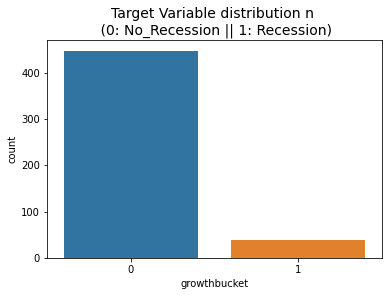

In [0]:
plt.title('Target Variable distribution n \n (0: No_Recession || 1: Recession)', fontsize=14)
sns.countplot(y,data=africandf)


####Pie Chart Representing Percentage of Imbalance

In [0]:
No_Recession=len(africandf[africandf['growthbucket']==0])
Recession= len(africandf[africandf['growthbucket']==1])

No_Recession_percentage= No_Recession/(Recession+No_Recession)
Recession_percentage= Recession/(Recession+No_Recession)


print("No Recession percentage is", No_Recession_percentage*100)
print("Recession percentage is", Recession_percentage*100)

No Recession percentage is 92.18106995884774
Recession percentage is 7.818930041152264


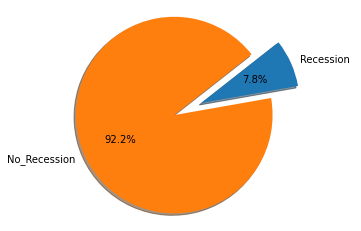

In [0]:
var_value = 'Recession','No_Recession'
size=[Recession_percentage,No_Recession_percentage]
design=(0.3,0)
fig, axi =plt.subplots()
axi.pie(size,explode=design,labels=var_value,autopct='%1.1f%%', shadow= True, startangle=10)
axi.axis('equal')
plt.show()

###Inspection of Dataset for some features

In [0]:
def hist(africandf):
  y=africandf.values
  sns.distplot(y,kde=False,rug=True)

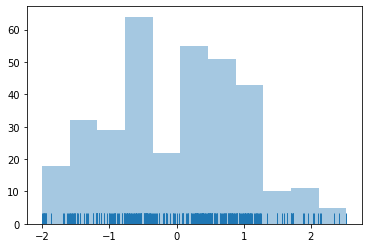

In [0]:
#train data
hist(x_train['emp_to_pop_ratio'])


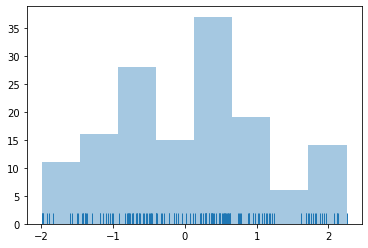

In [0]:
#test data 
hist(x_test['emp_to_pop_ratio'])

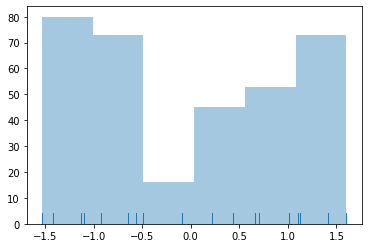

In [0]:
#train data
hist(x_train['total'])

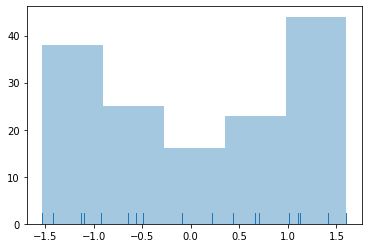

In [0]:
#test data 
hist(x_test['total'])

In [0]:
africandf.corr()

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket
pop,1.000000,0.985677,-0.042535,-0.042115,0.835119,0.817856,0.646504,0.657353,0.141465,0.064433,0.894972,0.873947,0.725990,-0.002483,-0.003811,0.108035,-0.076201,0.192466,0.000779,-0.094044,0.170199,0.184812,0.172467,0.015666,-0.122120,-0.411344,-0.050684,0.313505,-0.000115,0.133276,0.198400,0.214062,-0.136778,0.162225,0.304345,0.031383,0.061753,0.022697,0.059013,0.060414,0.058310,0.069565,-0.029336,-0.017113,-0.033329,-0.028125,0.016181,-0.025209,0.013820,-0.051343
emp,0.985677,1.000000,0.085165,-0.058018,0.799151,0.782817,0.630443,0.639471,0.054449,-0.023468,0.855301,0.834189,0.692692,0.028764,-0.008494,0.096011,-0.091276,0.194980,-0.046593,-0.067424,0.181464,0.196311,0.176746,-0.001176,-0.118794,-0.383090,-0.039610,0.316847,-0.015890,0.147164,0.203793,0.214430,-0.118112,0.170790,0.276428,0.040150,0.080482,0.028739,0.077266,0.079599,0.075150,0.092035,-0.038474,-0.022523,-0.043441,-0.036129,0.020744,-0.033492,0.016361,-0.043781
emp_to_pop_ratio,-0.042535,0.085165,1.000000,-0.134238,-0.152908,-0.152035,-0.091941,-0.079648,-0.637960,-0.643877,-0.156242,-0.161824,-0.145286,0.136259,-0.176390,-0.136445,0.073142,-0.027028,-0.482235,0.113029,0.045026,0.020981,-0.021483,0.049802,-0.104419,0.073724,-0.148457,0.152000,-0.025303,0.084053,-0.013125,-0.066965,0.091944,0.054155,-0.072015,0.048487,0.084070,0.038032,0.080816,0.078206,0.078355,0.089838,-0.036965,-0.024547,-0.041510,-0.034409,0.014324,-0.033934,0.020373,0.073136
hc,-0.042115,-0.058018,-0.134238,1.000000,0.212855,0.217829,0.256434,0.202944,0.431156,0.373653,0.180744,0.188996,0.225023,0.113904,0.006459,-0.032897,-0.163610,0.170982,0.279435,-0.285693,0.280996,0.252220,0.308306,-0.355653,0.213950,0.238221,0.322317,-0.338650,0.237878,0.323645,0.007505,0.089204,0.141779,0.063778,-0.057455,0.079707,0.149690,0.059444,0.143189,0.143941,0.140756,0.164539,-0.068397,-0.037893,-0.079536,-0.062916,0.038573,-0.058749,0.033226,0.049101
ccon,0.835119,0.799151,-0.152908,0.212855,1.000000,0.997384,0.892778,0.887317,0.294326,0.231745,0.977788,0.983324,0.909123,0.031034,0.051213,0.143418,-0.050133,0.161633,0.065469,-0.161317,0.194800,0.197678,0.219133,-0.061952,-0.051887,-0.232279,-0.012734,0.206846,0.038955,0.159864,0.103436,0.161494,-0.012436,0.230576,0.061723,0.075561,0.122806,0.060814,0.119590,0.100901,0.116718,0.115020,-0.054999,-0.033665,-0.062475,-0.052671,0.020996,-0.042242,0.026310,-0.033782
cda,0.817856,0.782817,-0.152035,0.217829,0.997384,1.000000,0.917373,0.913015,0.295538,0.232454,0.971209,0.982823,0.928398,0.041573,0.054051,0.147639,-0.056669,0.153195,0.079031,-0.168898,0.219923,0.217667,0.236986,-0.094544,-0.012709,-0.224118,0.000973,0.198858,0.042115,0.184497,0.097883,0.175282,0.002585,0.248494,0.048702,0.086292,0.137557,0.069977,0.133918,0.109408,0.132024,0.123176,-0.059905,-0.035835,-0.068274,-0.058303,0.023569,-0.043302,0.029090,-0.034279
cn,0.646504,0.630443,-0.091941,0.256434,0.892778,0.917373,1.000000,0.962802,0.225164,0.170920,0.849929,0.886028,0.940069,0.105521,0.065138,0.143686,-0.065634,0.080072,0.085165,-0.169126,0.303890,0.283109,0.291599,-0.212835,0.111776,-0.113965,0.058724,0.144572,0.039254,0.280513,0.072214,0.187859,0.092353,0.302548,-0.022302,0.088485,0.191590,0.058981,0.181104,0.189459,0.187339,0.217971,-0.097876,-0.064457,-0.104391,-0.107305,0.050724,-0.079497,0.050305,-0.008006
ck,0.657353,0.639471,-0.079648,0.202944,0.887317,0.913015,0.962802,1.000000,0.215724,0.137597,0.850044,0.887415,0.942950,0.087807,0.017325,0.095003,-0.120120,0.038409,0.146453,-0.189439,0.357682,0.325987,0.323184,-0.293243,0.136719,-0.144581,0.171639,0.177616,-0.049159,0.327364,0.085012,0.240864,0.00

##2. Performing cross-validation on the dataset using Decision Tree and Random Forest to establish a baseline

In [0]:
def boxplot(a,b,c,d):
  metric=pd.DataFrame(a,columns=['Acc_scores'])
  metric['Pre_scores']=b
  metric['Rec_scores']=c
  metric['F1_scores']=d
  plt.figure(6)
  boxplot = metric.boxplot(column=['Acc_scores','Pre_scores','Rec_scores','F1_scores'])

In [0]:
#Function to establish a baseline and find average and accuracy 
def baseline(model,x,y):
  Acc_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(accuracy_score)) #calculates accuracy 
  Pre_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(precision_score)) #calculates precision
  Rec_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(recall_score)) #calculates Recall
  F1_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(f1_score)) #calculates F1
  print("Accuracy:", Acc_scores)
  print("Precision:", Pre_scores)
  print("Recall:", Rec_scores)
  print("F1 Score:", F1_scores)
  #Averages of the scores printed out
  print("Average Accuracy: %0.2f (+/- %0.2f)" % (Acc_scores.mean(), Acc_scores.std() * 2))
  print("Average Precision: %0.2f (+/- %0.2f)" % (Pre_scores.mean(), Pre_scores.std() * 2))
  print("Average Recall: %0.2f (+/- %0.2f)" % (Rec_scores.mean(), Rec_scores.std() * 2))
  print("Average F1 Score: %0.2f (+/- %0.2f)" % (F1_scores.mean(), F1_scores.std() * 2))
  boxplot(Acc_scores, Pre_scores,Rec_scores,F1_scores)
  


In [0]:
x=africandf.drop('growthbucket', axis=1) ##Predictors
y=africandf.growthbucket ## Target variable

Accuracy: [0.06122449 0.42857143 0.89795918 0.91836735 0.91836735 0.79591837
 0.41666667 0.91666667 0.41666667 0.8125    ]
Precision: [0.0625     0.         0.33333333 0.5        0.5        0.125
 0.03703704 0.         0.07142857 0.        ]
Recall: [0.75       0.         0.25       0.5        0.75       0.25
 0.33333333 0.         0.5        0.        ]
F1 Score: [0.11538462 0.         0.28571429 0.5        0.6        0.16666667
 0.06666667 0.         0.125      0.        ]
Average Accuracy: 0.66 (+/- 0.58)
Average Precision: 0.16 (+/- 0.39)
Average Recall: 0.33 (+/- 0.55)
Average F1 Score: 0.19 (+/- 0.40)


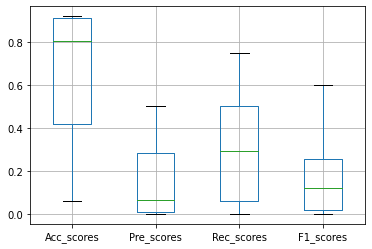

In [0]:
#Decision Tree to perform cross validation
decclf = DecisionTreeClassifier(random_state=0)
baseline(decclf,x,y)

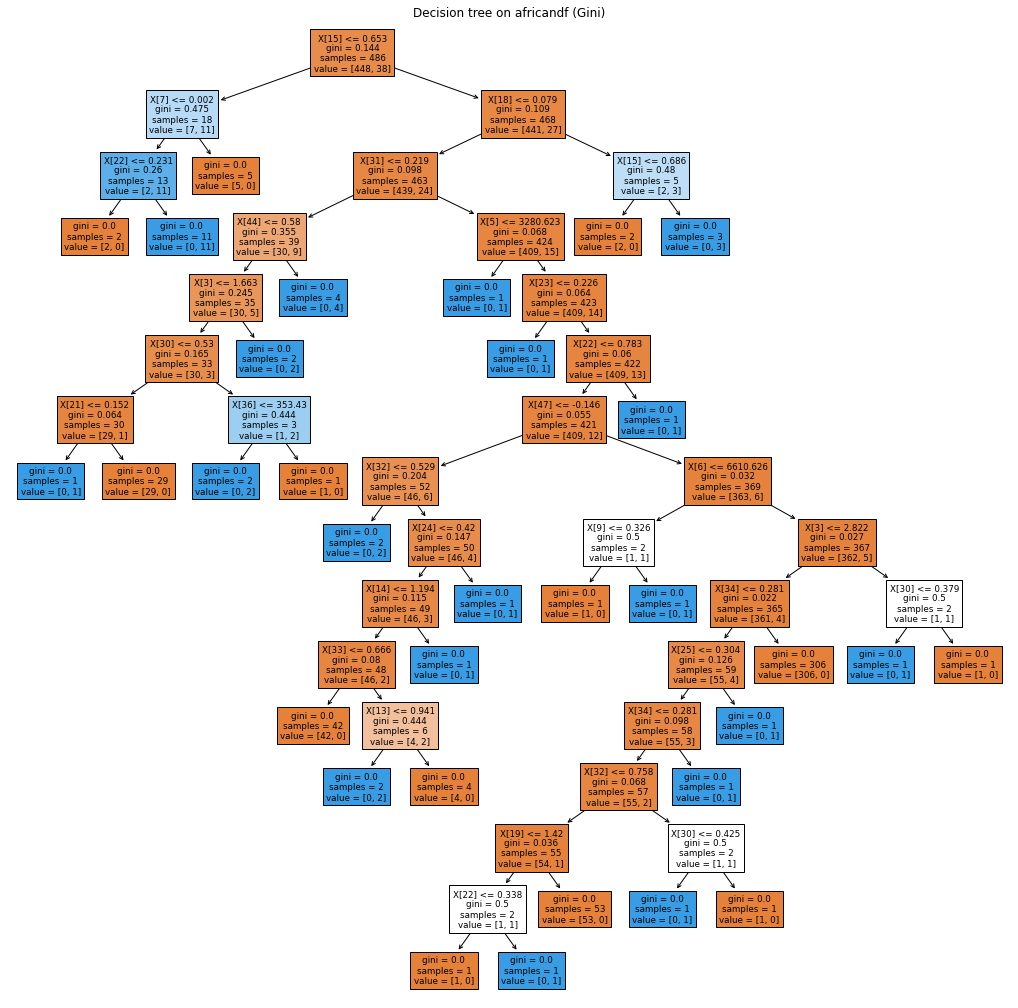

In [0]:
# Decision Tree
plt.figure(figsize=(18,18))
plottree=plot_tree(decclf.fit(x, y),filled=True)
plt.title("Decision tree on africandf (Gini)")
plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: [0.46938776 0.42857143 0.89795918 0.93877551 0.97959184 0.93877551
 0.9375     0.9375     0.85416667 0.91666667]
Precision: [0.17391304 0.         0.         1.         1.         0.5
 0.         0.         0.         0.        ]
Recall: [0.75 0.   0.   0.25 0.75 0.25 0.   0.   0.   0.  ]
F1 Score: [0.36363636 0.         0.         0.66666667 0.57142857 0.4
 0.         0.         0.         0.        ]
Average Accuracy: 0.83 (+/- 0.39)
Average Precision: 0.27 (+/- 0.79)
Average Recall: 0.20 (+/- 0.58)
Average F1 Score: 0.20 (+/- 0.51)


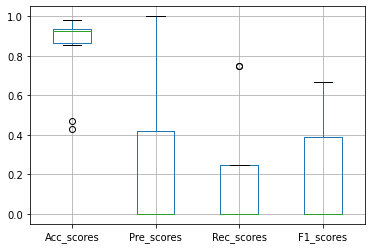

In [0]:
#Performing random forest classifier cross validation 
RFC=RandomForestClassifier()
baseline(RFC,x,y)

##3. Partition each of the datasets into 10 bins, keeping the imbalance ratio from the original dataset using stratified cross-validation 


## Stratified CV 

In [0]:
Folds = StratifiedKFold(n_splits=10,shuffle=False,random_state=None)
for train_index, test_index in Folds.split(x, y):
  xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
  ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
  train_0, train_1 = len(ytrain[ytrain==0]), len(ytrain[ytrain==1])
  test_0, test_1 = len(ytest[ytest==0]), len(ytest[ytest==1])
  print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
  print(xtrain.shape)
  print(xtest.shape)
  

>Train: 0=403, 1=34, Test: 0=45, 1=4
(437, 49)
(49, 49)
>Train: 0=403, 1=34, Test: 0=45, 1=4
(437, 49)
(49, 49)
>Train: 0=403, 1=34, Test: 0=45, 1=4
(437, 49)
(49, 49)
>Train: 0=403, 1=34, Test: 0=45, 1=4
(437, 49)
(49, 49)
>Train: 0=403, 1=34, Test: 0=45, 1=4
(437, 49)
(49, 49)
>Train: 0=403, 1=34, Test: 0=45, 1=4
(437, 49)
(49, 49)
>Train: 0=403, 1=35, Test: 0=45, 1=3
(438, 49)
(48, 49)
>Train: 0=403, 1=35, Test: 0=45, 1=3
(438, 49)
(48, 49)
>Train: 0=404, 1=34, Test: 0=44, 1=4
(438, 49)
(48, 49)
>Train: 0=404, 1=34, Test: 0=44, 1=4
(438, 49)
(48, 49)


####Training Data

No Recession Percentage is 91.66666666666666
Recession Percentage is 8.333333333333332


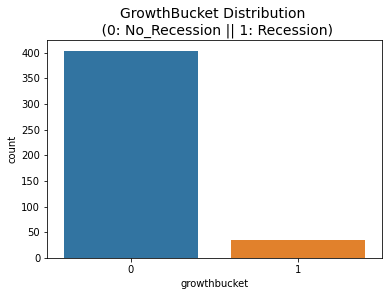

In [0]:
No_Recession=len(ytrain[ytrain==0])
Recession= len(ytrain[ytrain==1])

No_Recession_percentage= no_recession/(recession+no_recession)
Recession_percentage= recession/(recession+no_recession)

print("No Recession Percentage is", No_Recession_percentage*100)
print("Recession Percentage is", Recession_percentage*100)

plt.title('GrowthBucket Distribution \n (0: No_Recession || 1: Recession)', fontsize=14)
sns.countplot(ytrain,data=xtrain)


####Test Data

No Recession Percentage is 91.66666666666666
Recession Percentage is 8.333333333333332


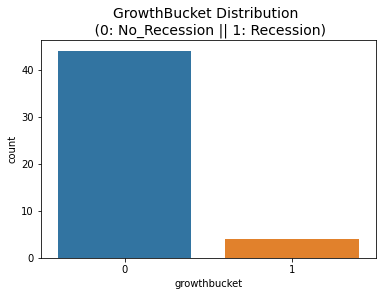

In [0]:
No_Recession=len(ytest[ytest==0])
Recession= len(ytest[ytest==1])

No_Recession_percentage= no_recession/(recession+no_recession)
Recession_percentage= recession/(recession+no_recession)

print("No Recession Percentage is", No_Recession_percentage*100)
print("Recession Percentage is", Recession_percentage*100)

plt.title('GrowthBucket Distribution \n (0: No_Recession || 1: Recession)', fontsize=14)
sns.countplot(ytest,data=xtest)

Skewed K folds is completed as both test and traing data share the same balance ratio.

##Elbow and Silhoutte method

In [0]:
#Elbow method function
def elbow():
  Sum_of_squared_distances = []
  K = range(1,30)
  for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(xtrain)
    Sum_of_squared_distances.append(km.inertia_)
  plt.figure(1)
  plt.plot(K, Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('dist(Sun of squares)')
  plt.title('Optimal K: Elbow Method')
  plt.show()

In [0]:
def silhoutte():
  silhoutte=[]
  k_silhoutte= range(2,10)
  for k_s in k_silhoutte:
    print(k_silhoutte,end=' ')
    kmeans= KMeans(n_clusters=k_s)
    kmeans=kmeans.fit(xtrain)
    labels=kmeans.labels_
    silhoutte.append(silhouette_score(xtrain,labels,metric='euclidean')) 
  plt.figure(2)
  plt.plot(k_silhoutte,silhoutte, 'bx-')
  plt.xlabel('k')
  plt.ylabel('silhouette_score')
  plt.title('Optimal K: Silhoutte Method')
  plt.show

##Summerise the distributions

Begin process
-------------------------------------------------------


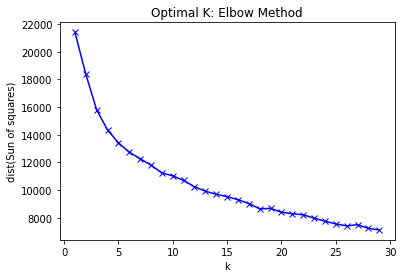

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters Train Labels 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 3 1 1 1 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 3 1 2 3 1 1 1 1
 1 1 1 1 1 1 3 1 2 1 1 3 1 1 1 1 1 1 3 1 1 3 1 1 1 3 2 4 4 4 4 4 4 4 3 2 4
 2 4 4 4 4 4 4 3 4 4 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 3 4 4 4 3 4 4 4 4 2
 4 4 3 4 4 3 4 2 4 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 2 0 0 0 0 2 3
 3 4 2 2 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 3 4 4 4 4 4 4 3 4 4 4 4 4 4 3 4
 4 4 4 3 4 4 2 4 4 4 4 4 3 2 4 4 4 4 4 4 4 3 4 3 4 3 4 2 4 4 4 4 4 4 4 4 4
 3 2 4 4 3 4 4 4 3 2 4 4 3 4 4 4 4 3 4 4 3 4 3 4 4 4 3 4 4 4 2 4 4 3 4 4 4
 3 2 3 4 3 4 4 4 4 4 4 4 4 4 3 4 2 4 4 4 4 3 4

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [1.  1.  1.  1.  1.  0.8 0.6 0.8 0.8 1. ]
Precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.90 (+/- 0.27)
Average Precision: 0.00 (+/- 0.00)
Average Recall: 0.00 (+/- 0.00)
Average F1 Score: 0.00 (+/- 0.00)
-------------------------------------------------------
Begin process
-------------------------------------------------------


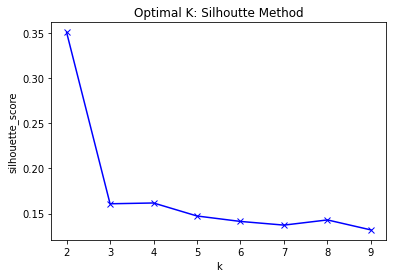

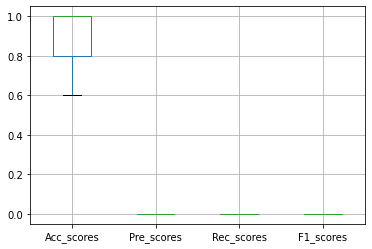

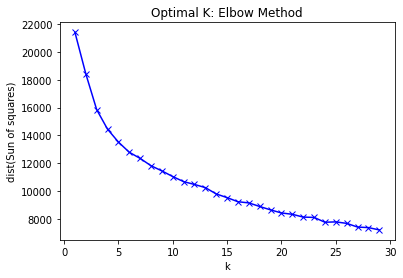

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters Train Labels 
 [4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 4 4 1 4 4 4 1 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 1 4 3 1 4 4 4 4
 4 4 4 4 4 4 1 4 3 4 4 1 4 2 4 4 4 4 1 4 4 1 4 4 4 1 3 2 2 2 2 2 2 2 1 3 2
 3 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 3
 2 2 1 2 2 1 2 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0 0 0 0 3 1
 1 2 3 3 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2
 2 2 2 1 2 2 3 2 2 2 2 2 1 3 2 2 2 2 2 2 2 1 2 1 2 1 2 3 2 2 2 2 2 2 2 2 2
 2 3 2 2 1 2 2 2 1 3 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 2 2 3 2 2 2 2 2 2
 2 3 1 2 1 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 1 2

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [0.8 1.  1.  0.8 1.  1.  1.  1.  1.  1. ]
Precision: [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Recall: [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.96 (+/- 0.16)
Average Precision: 0.20 (+/- 0.80)
Average Recall: 0.20 (+/- 0.80)
Average F1 Score: 0.30 (+/- 0.92)
-------------------------------------------------------
Begin process
-------------------------------------------------------


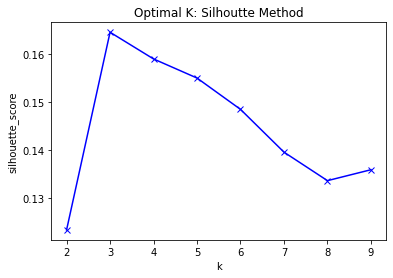

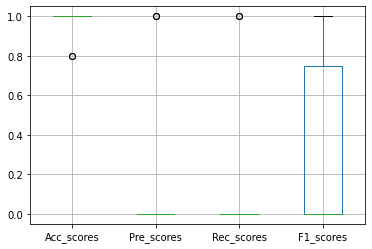

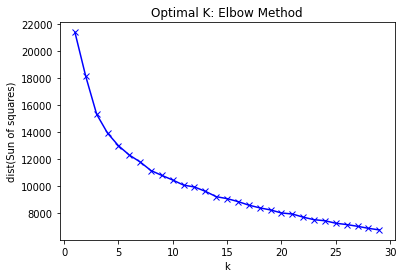

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters Train Labels 
 [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 4 3 1 1 3 3
 1 1 3 3 3 3 0 3 4 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 4 3 3 3 3 3 3 3 3 4 3
 4 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 4
 3 3 3 3 3 0 3 4 3 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 4 2 2 2 2 4 3
 0 3 4 4 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3
 3 3 3 0 3 3 4 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 0 3 3 3 4 3 3 3 3 3 3 3 3 3
 3 4 3 3 0 3 3 3 0 4 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 4 3 3 3 3 3 3
 3 4 3 3 0 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 0 3

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Precision: [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
Recall: [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
F1 Score: [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 1.00 (+/- 0.00)
Average Precision: 0.40 (+/- 0.98)
Average Recall: 0.40 (+/- 0.98)
Average F1 Score: 0.40 (+/- 0.98)
-------------------------------------------------------
Begin process
-------------------------------------------------------


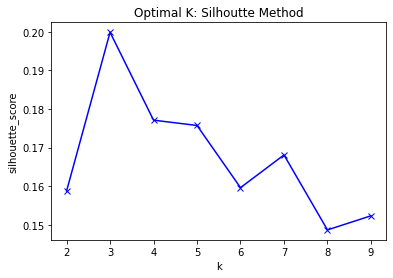

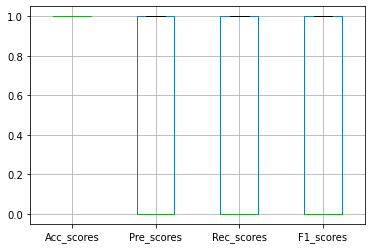

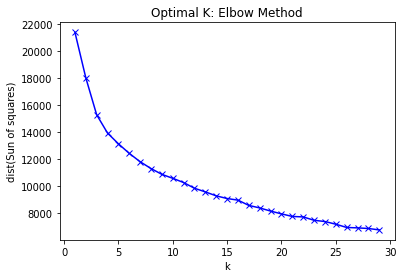

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters Train Labels 
 [4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 2 4 4 4 4 4 2 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 4
 4 0 4 4 4 0 4 4 0 4 4 4 4 4 4 4 4 4 4 4 0 4 4 3 0 4 4 4 4 4 4 4 4 4 2 3 4
 0 0 3 3 3 3 3 0 3 3 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 3 2
 3 3 0 3 3 0 3 2 3 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1 1 2 0
 0 3 2 2 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3 3 0 3
 3 3 3 0 3 3 2 3 3 3 3 3 0 2 3 3 3 3 3 3 3 0 3 0 3 0 3 2 3 3 3 3 3 3 3 3 3
 0 2 3 3 0 3 3 3 0 2 3 3 0 3 3 3 3 0 3 3 0 3 0 3 3 3 0 3 3 3 2 3 3 0 3 3 3
 0 2 0 3 0 3 3 3 3 3 3 3 3 3 0 3 2 3 3 3 3 0 3

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [1.  1.  1.  0.8 1.  1.  1.  1.  1.  1. ]
Precision: [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
Recall: [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.98 (+/- 0.12)
Average Precision: 0.30 (+/- 0.92)
Average Recall: 0.30 (+/- 0.92)
Average F1 Score: 0.30 (+/- 0.92)
-------------------------------------------------------
Begin process
-------------------------------------------------------


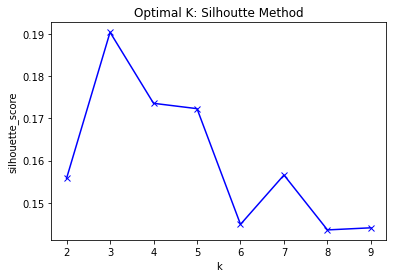

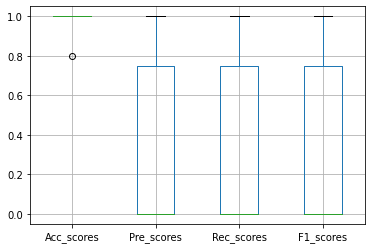

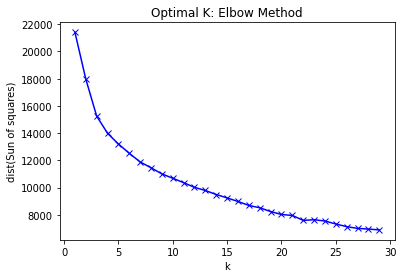

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters Train Labels 
 [2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 4 2 2 2 4 2 2 2 2 2 4 4 4
 4 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 0 4 4 1 4 0 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 0 4
 4 4 4 1 4 4 1 0 4 0 4 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 0 1
 1 4 0 0 4 4 4 1 4 4 1 4 4 4 1 1 1 4 4 4 4 1 1 1 4 4 4 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [1.  0.8 1.  0.8 1.  1.  1.  1.  1.  1. ]
Precision: [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Recall: [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.96 (+/- 0.16)
Average Precision: 0.20 (+/- 0.80)
Average Recall: 0.20 (+/- 0.80)
Average F1 Score: 0.20 (+/- 0.80)
-------------------------------------------------------
Begin process
-------------------------------------------------------


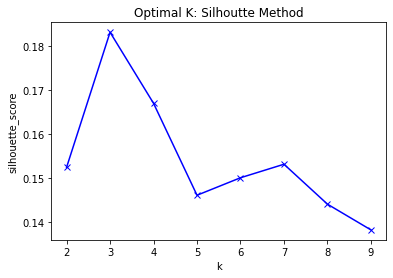

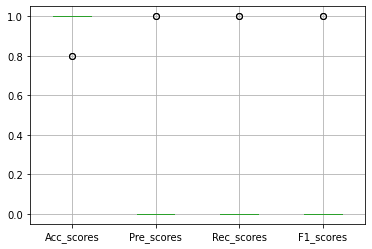

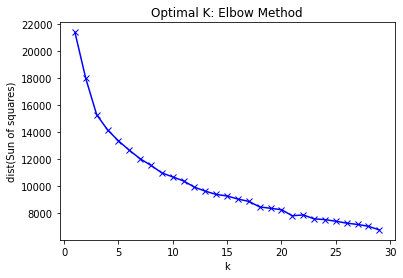

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters Train Labels 
 [2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 0 0 0 0
 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 4 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 4 0 0 0 0 3 0 0 3 4 0 4 0 0 0 3 0 0 3 0 0 3 0 0 0 0 3 0 3 3 3 0 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 4 3 1 1 1 1 1 4 0 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3
 3 4 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3
 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [0.8 0.8 0.8 0.8 1.  1.  1.  1.  1.  1. ]
Precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.92 (+/- 0.20)
Average Precision: 0.00 (+/- 0.00)
Average Recall: 0.00 (+/- 0.00)
Average F1 Score: 0.00 (+/- 0.00)
-------------------------------------------------------
Begin process
-------------------------------------------------------


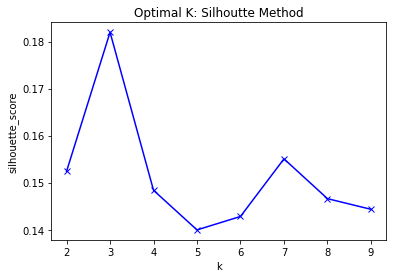

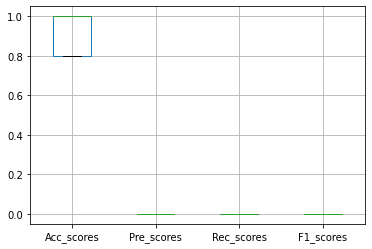

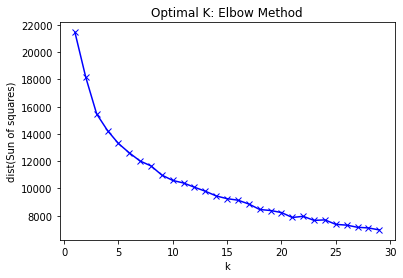

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters Train Labels 
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4
 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 3 4 4 1 4 3 1 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 1 4 4 1 4 4 4
 4 3 4 4 4 4 1 1 4 1 3 4 3 4 4 4 4 4 4 1 4 4 1 4 4 4 4 1 4 1 1 1 4 1 1 1 1
 4 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 2 2 2 1 1 4 3 3 4 4 4 1 4 4 1 1 4 4 1 1 1 4 4 4 1 1 1 1 1 1 1
 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1
 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [1.  1.  0.8 1.  1.  1.  1.  1.  1.  1. ]
Precision: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.98 (+/- 0.12)
Average Precision: 0.10 (+/- 0.60)
Average Recall: 0.20 (+/- 0.80)
Average F1 Score: 0.10 (+/- 0.60)
-------------------------------------------------------
Begin process
-------------------------------------------------------


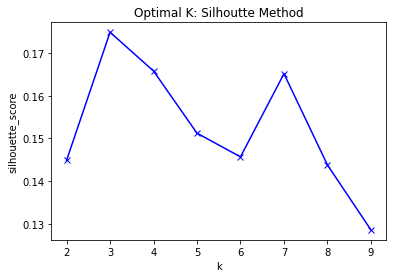

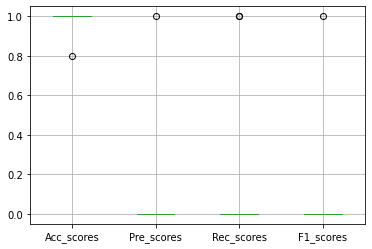

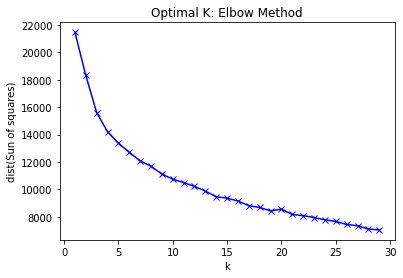

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters Train Labels 
 [1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 3 1 1 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4
 4 3 3 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4
 4 3 4 4 0 4 3 0 4 4 4 4 4 4 4 4 4 4 0 4 3 4 4 0 4 4 4 4 4 4 0 4 4 0 4 4 4
 0 3 0 4 0 4 0 0 4 0 3 0 3 0 4 0 0 4 4 0 4 4 0 4 0 4 4 0 0 0 0 0 4 0 0 0 0
 4 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 2 2 2 2 3 0 0 0 3 3 4 4 4 0 0 4 0 0 4 4 0 0 0 4 4 4 0 0 0 0 0
 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 4 0 0 0 0 0 0 0 0 0 0 0
 0 3 0 0 4 0 0 0 0 0 0 0 0 0 0 4 0 0 3 0 0 0 0

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [0.8  0.8  0.8  1.   1.   1.   1.   1.   1.   0.75]
Precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.92 (+/- 0.21)
Average Precision: 0.00 (+/- 0.00)
Average Recall: 0.00 (+/- 0.00)
Average F1 Score: 0.00 (+/- 0.00)
-------------------------------------------------------
Begin process
-------------------------------------------------------


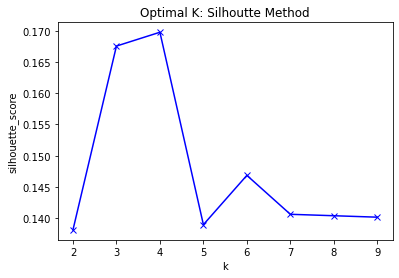

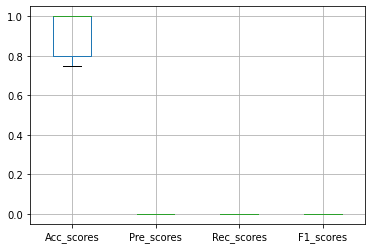

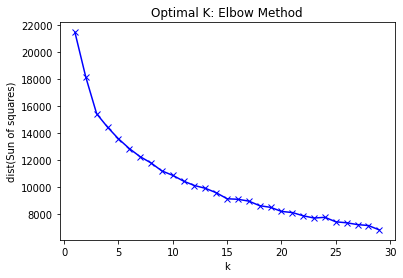

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters Train Labels 
 [2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1
 1 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 4 1 1 0 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 0 4 1 1 0 1 0 0 1 0 4 1 4 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 4 3 3 3 3 4 0 0 0 4 4 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 4 1 0 0 0 0 0 0 0 0 0 0
 0 0 4 0 0 1 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [1.  0.8 1.  1.  0.8 0.8 0.8 0.8 1.  1. ]
Precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Average Accuracy: 0.90 (+/- 0.20)
Average Precision: 0.00 (+/- 0.00)
Average Recall: 0.00 (+/- 0.00)
Average F1 Score: 0.10 (+/- 0.60)
-------------------------------------------------------
Begin process
-------------------------------------------------------


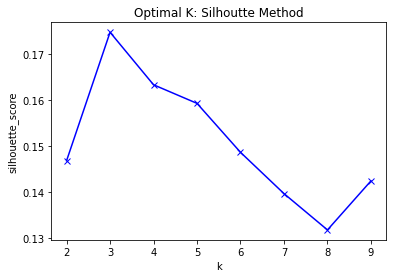

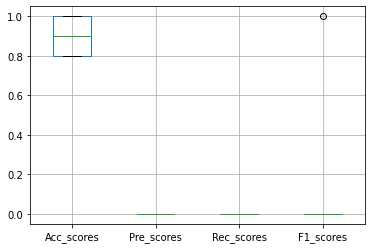

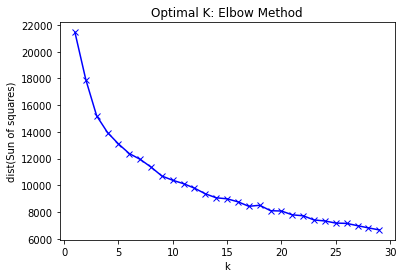

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters Train Labels 
 [2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 3 3 1 1 1 1 1 2 1 2 2 1 2 2 2 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1 2 2 1 1 2 2
 1 3 1 2 1 2 3 1 2 2 1 2 2 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 3 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 0 0 0 3 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 4 4 4 4 4 4 4 4 4
 4 4 3 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 3 4

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [1.  1.  1.  1.  0.8 0.8 0.6 0.8 1.  1. ]
Precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.90 (+/- 0.27)
Average Precision: 0.00 (+/- 0.00)
Average Recall: 0.00 (+/- 0.00)
Average F1 Score: 0.00 (+/- 0.00)
-------------------------------------------------------


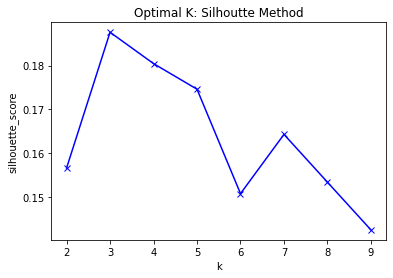

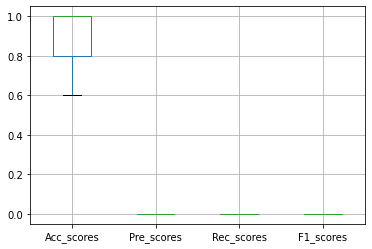

In [0]:
for train_index, test_index in skf.split(x, y):  
  #selects rows
  xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
  ytrain, ytest = y.iloc[train_index], y.iloc[test_index]    
  std_scaled=StandardScaler().fit(xtrain)
  xtrain=std_scaled.transform(xtrain)
  xtest=std_scaled.transform(xtest)

  print('Begin process')
  print('-----------'*5)
  #calling elbow and silhoutte method
  elbow()
  silhoutte()
  #run kmeans
  numk=5
  kmeans=KMeans(n_clusters=numk)
  kmeans = kmeans.fit(xtrain)

  y_train_clusters = kmeans.predict(xtrain)
  print('-----------'*5)
  print('-----------ytrain-------------')
  print('-----------'*5)
  print('Closest Clusters Train Labels \n', y_train_clusters)
  

  #gets each clusters centroid points
  centroids=kmeans.cluster_centers_
  print('centroids \n', centroids)
  print('-----------'*5)
  print('cluster center shape \n',kmeans.cluster_centers_.shape)
  print('-----------'*5) 
  
  #append the cluster labels into df
  df0=pd.DataFrame(data=xtrain)
  df0['clusters']=y_train_clusters
  
  #prints clusters labels in ascending order for each iteration
  print('-----------'*5)
  print('clusters \n',df0.clusters.unique())
  #prints out the number of samples of the minority class
  print('-----------'*5)
  print('number of samples for each cluster \n', Counter(y_train_clusters))
  print('-----------'*5)

  #Assigning xtest samples
  y_test_clusters =  kmeans.predict(xtest)
  df1=pd.DataFrame(data=xtest)
  df1['clusters']=y_test_clusters
  print('---------ytest--------------')
  #Predict the closest cluster
  print('-----------'*5)
  print('Closest Clusters Test Labels \n', y_test_clusters)
  RFC=RandomForestClassifier()
  print('-----------'*5)
  baseline(RFC,df1,ytest)
  print('-----------'*5)
